In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import datetime

In [11]:
pwd

'C:\\Users\\HP\\anaconda3'

In [2]:
# os.getcwd()
df=pd.read_csv(r'Irish_DataSet\File1.txt',header=None,delimiter=" ")
df.head()

,0,1,2
0,1392,19503,0.140
1,1392,19504,0.138
2,1392,19505,0.140
3,1392,19506,0.145
4,1392,19507,0.145


In [3]:
df.rename(columns={0: "MeterId", 1: "Timestamp", 2: "Consumption"},inplace=True)
df.columns
df.shape
df.head()

,MeterId,Timestamp,Consumption
0,1392,19503,0.140
1,1392,19504,0.138
2,1392,19505,0.140
3,1392,19506,0.145
4,1392,19507,0.145


In [4]:
def is_valid_integer(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

In [5]:
df["Day"]= df["Timestamp"].apply(lambda x: str(x)[:3] if is_valid_integer(str(x)) else None)
df["Time"]=df["Timestamp"].apply(lambda x: str(x)[3:] if is_valid_integer(str(x)) else None)
df.head(4)

,MeterId,Timestamp,Consumption,Day,Time
0,1392,19503,0.140,195,03
1,1392,19504,0.138,195,04
2,1392,19505,0.140,195,05
3,1392,19506,0.145,195,06


In [6]:
df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce', downcast='integer')
df['Day'] = pd.to_numeric(df['Day'], errors='coerce', downcast='integer')
df['Time'] = pd.to_numeric(df['Time'], errors='coerce', downcast='integer')
df.dtypes

MeterId          int64
Timestamp        int32
Consumption    float64
Day              int16
Time              int8
dtype: object

## Cleaning the data

In [7]:
missing_values = df.isna().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
MeterId        0
Timestamp      0
Consumption    0
Day            0
Time           0
dtype: int64


In [8]:
meter_days = df.groupby('MeterId')['Day'].unique().to_dict()
min_day = df['Day'].min()
max_day = df['Day'].max()

missing_days = {}

for meter_id, days in meter_days.items():
    all_days = set(range(min_day, max_day + 1))
    missing = all_days - set(days)
    missing_days[meter_id] = sorted(list(missing))

for meter_id, missing_day_list in missing_days.items():
    print(f"Meter {meter_id} has {len(missing_day_list)} missing days:")
    print(missing_day_list)
    print()

Meter 1000 has 0 missing days:
[]

Meter 1001 has 0 missing days:
[]

Meter 1002 has 0 missing days:
[]

Meter 1003 has 0 missing days:
[]

Meter 1004 has 0 missing days:
[]

Meter 1005 has 0 missing days:
[]

Meter 1006 has 0 missing days:
[]

Meter 1007 has 1 missing days:
[722]

Meter 1008 has 1 missing days:
[704]

Meter 1009 has 0 missing days:
[]

Meter 1010 has 60 missing days:
[671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730]

Meter 1011 has 66 missing days:
[665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 72

In [9]:
for meterId, days in meter_days.items():
    si = len(days)
    days_set = sorted(list(days))
    start = days_set[0]
    end = days_set[-1]
    dif = end - start + 1
    
    if dif != si:
        print(f"MeterId: {meterId}")
        print(f"Total days: {si}, Range: {start} - {end}")
        expected_day = start
        
        for day in days_set:
            if day != expected_day:
                print(f"Missing days between {expected_day} and {day - 1}")
            expected_day = day + 1

MeterId: 1007
Total days: 535, Range: 195 - 730
Missing days between 722 and 722
MeterId: 1008
Total days: 535, Range: 195 - 730
Missing days between 704 and 704
MeterId: 1017
Total days: 534, Range: 195 - 730
Missing days between 703 and 704
MeterId: 1023
Total days: 535, Range: 195 - 730
Missing days between 704 and 704
MeterId: 1025
Total days: 535, Range: 195 - 730
Missing days between 704 and 704
MeterId: 1029
Total days: 535, Range: 195 - 730
Missing days between 722 and 722
MeterId: 1034
Total days: 535, Range: 195 - 730
Missing days between 704 and 704
MeterId: 1046
Total days: 535, Range: 195 - 730
Missing days between 722 and 722
MeterId: 1051
Total days: 535, Range: 195 - 730
Missing days between 722 and 722
MeterId: 1066
Total days: 508, Range: 221 - 730
Missing days between 703 and 704
MeterId: 1068
Total days: 535, Range: 195 - 730
Missing days between 566 and 566
MeterId: 1070
Total days: 514, Range: 215 - 730
Missing days between 703 and 704
MeterId: 1078
Total days: 53

In [31]:
correct = []
wrong = {}
meter_days = df.groupby('MeterId')['Day'].unique().to_dict()

for meterId,days in meter_days.items():
    for values in days:
        if 195 <= values <= 730:
            correct.append(meterId)
        else:
            if meterId in wrongMeter:
                wrong[meterId] += 1
            else:
                wrong[meterId] = 1

print("Right Meters:")
print(correct)

print("\nWrong Meters:")
for meterId, count in wrong.items():
    print(f"MeterId: {meterId}, Count: {count}")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
df.describe()

,MeterId,Timestamp,Consumption,Day,Time
count,2.446584e+07,2.446584e+07,2.446584e+07,2.446584e+07,2.446584e+07
mean,1.500390e+03,4.588802e+04,6.993640e-01,4.586351e+02,2.450615e+01
std,2.887520e+02,1.543705e+04,1.363046e+00,1.543704e+02,1.385593e+01
min,1.000000e+03,1.950100e+04,0.000000e+00,1.950000e+02,1.000000e+00
25%,1.250000e+03,3.251300e+04,1.260000e-01,3.250000e+02,1.300000e+01
50%,1.501000e+03,4.570600e+04,2.800000e-01,4.570000e+02,2.500000e+01
75%,1.751000e+03,5.920900e+04,6.990000e-01,5.920000e+02,3.700000e+01
max,1.999000e+03,7.304800e+04,4.384400e+01,7.300000e+02,9.500000e+01


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24465838 entries, 0 to 24465837
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   MeterId      int64  
 1   Timestamp    object 
 2   Consumption  float64
 3   Day          object 
 4   Time         object 
dtypes: float64(1), int64(1), object(3)
memory usage: 933.3+ MB


In [52]:
df.tail()
df.columns

Index(['MeterId', 'Timestamp', 'Consumption', 'Day', 'Time', 'ExtraReading'], dtype='object')

##  Find unique values

In [53]:
unique_values = df.nunique()
print("Unique Values in Each Column:")
print(unique_values)

Unique Values in Each Column:
MeterId          1000
Timestamp       26010
Consumption     26444
Day               536
Time               95
ExtraReading    72643
dtype: int64


In [18]:
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [MeterId, Timestamp, Consumption, Day, Time]
Index: []


In [21]:
# Remove rows with duplicate values in all columns
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame without duplicates
print(df_no_duplicates)

          MeterId Timestamp  Consumption  Day Time
0            1392     19503        0.140  195   03
1            1392     19504        0.138  195   04
2            1392     19505        0.140  195   05
3            1392     19506        0.145  195   06
4            1392     19507        0.145  195   07
...           ...       ...          ...  ...  ...
24465833     1703     73044        0.176  730   44
24465834     1703     73045        0.204  730   45
24465835     1703     73046        0.178  730   46
24465836     1703     73047        0.176  730   47
24465837     1703     73048        0.199  730   48

[24465838 rows x 5 columns]


In [23]:
sorted_df = df.sort_values(by='MeterId')
sorted_df.head()

,MeterId,Timestamp,Consumption,Day,Time
11619429,1000,44244,0.223,442,44
7163514,1000,34745,0.177,347,45
7163513,1000,34744,0.515,347,44
7163512,1000,34743,0.544,347,43
7163511,1000,34742,1.019,347,42


In [38]:
df['Consumption'].unique().sum()
df['Consumption'].sum()
df['Consumption'].value_counts()

0.000     243300
0.084      59246
0.085      58358
0.083      57621
0.104      56704
           ...  
24.277         1
30.721         1
27.718         1
25.234         1
23.962         1
Name: Consumption, Length: 26444, dtype: int64

In [16]:
df[df['Consumption']==0].value_counts()

MeterId  Timestamp  Consumption  Day  Time
1002     53401      0.0          534  1       1
1687     19924      0.0          199  24      1
         19912      0.0          199  12      1
         19913      0.0          199  13      1
         19914      0.0          199  14      1
                                             ..
1335     44548      0.0          445  48      1
         44601      0.0          446  1       1
         44602      0.0          446  2       1
         44603      0.0          446  3       1
1998     22330      0.0          223  30      1
Length: 243300, dtype: int64

In [87]:
zero_consumption_count = (df['Consumption'] == 0).sum()
print(f"Number of zero consumption values: {zero_consumption_count}")

# Find the indices (positions) of zero consumption values
zero_consumption_indices = df[df['Consumption'] == 0].index
print(f"Indices of zero consumption values: {zero_consumption_indices}")

Number of zero consumption values: 243300
Indices of zero consumption values: Int64Index([    6064,     6075,     6083,     6088,     6093,     6139,
                6155,     6163,     6168,     6176,
            ...
            24464204, 24464207, 24464210, 24464214, 24464230, 24464243,
            24464257, 24464260, 24464263, 24464267],
           dtype='int64', length=243300)


In [12]:
positive_consumption_count = (df['Consumption'] > 0).sum()
print(f"Number of + consumption values: {positive_consumption_count}")

Number of + consumption values: 24222538


In [24]:
meter_1392_total_consumption = df[df['MeterId'] == 1392]['Consumption'].sum()
print("Total Consumption for MeterId 1392:", meter_1392_total_consumption)

Total Consumption for MeterId 1392: 1131.88


In [30]:
total_consumption = df.groupby('MeterId')['Consumption'].sum().reset_index()

# Display the total consumption for each MeterId
print("Total Consumption for Each Meter:")
print(total_consumption)

Total Consumption for Each Meter:
     MeterId  Consumption
0       1000     5515.675
1       1001     5090.375
2       1002     5352.830
3       1003    16305.581
4       1004    25326.442
..       ...          ...
995     1995    14337.085
996     1996    17072.802
997     1997    16747.415
998     1998    15066.816
999     1999    19687.877

[1000 rows x 2 columns]


In [31]:
# Check if the total consumption of any meter is zero
meters_with_zero_consumption = total_consumption[total_consumption['Consumption'] == 0]

if not meters_with_zero_consumption.empty:
    print("\nMeters with Zero Consumption:")
    print(meters_with_zero_consumption)
else:
    print("\nNo Meters with Zero Consumption.")


No Meters with Zero Consumption.


In [39]:
# Sort the DataFrame by 'MeterId' and 'Timestamp'
df.sort_values(by=['MeterId', 'Timestamp'], inplace=True)

# Calculate the extra reading (to calculate it for each MeterId)
df['ExtraReading'] = df.groupby('MeterId')['Consumption'].diff()

# Display the DataFrame with the extra reading
print(df)

          MeterId Timestamp  Consumption  Day Time  ExtraReading
127113       1000     19501        0.117  195   01           NaN
127114       1000     19502        0.050  195   02        -0.067
127115       1000     19503        0.025  195   03        -0.025
127116       1000     19504        0.025  195   04         0.000
127117       1000     19505        0.049  195   05         0.024
...           ...       ...          ...  ...  ...           ...
24182441     1999     73044        2.831  730   44         1.399
24182442     1999     73045        4.180  730   45         1.349
24182443     1999     73046        2.372  730   46        -1.808
24182444     1999     73047        3.488  730   47         1.116
24182445     1999     73048        3.972  730   48         0.484

[24465838 rows x 6 columns]


In [43]:
# Count positive, negative, and zero extra readings
positive_count = (df['ExtraReading'] > 0).sum()
negative_count = (df['ExtraReading'] < 0).sum()
zero_count = (df['ExtraReading']==0).sum()

# Display the results
print("Positive Extra Readings:", positive_count)
print("Negative Extra Readings:", negative_count)
print("Zero Extra Readings:", zero_count)

Positive Extra Readings: 10966650
Negative Extra Readings: 12313453
Zero Extra Readings: 1184735


In [44]:
df[(df['ExtraReading'] > 0)]

,MeterId,Timestamp,Consumption,Day,Time,ExtraReading
127117,1000,19505,0.049,195,05,0.024
127118,1000,19506,0.117,195,06,0.068
127122,1000,19510,0.048,195,10,0.024
127123,1000,19511,0.114,195,11,0.066
127127,1000,19515,0.049,195,15,0.025
...,...,...,...,...,...,...
24182438,1999,73041,5.518,730,41,0.740
24182441,1999,73044,2.831,730,44,1.399
24182442,1999,73045,4.180,730,45,1.349
24182444,1999,73047,3.488,730,47,1.116


In [19]:
# df[df[(df['ExtraReading'] > 0)].max()]

## Relationship analysis

In [17]:
correlation = df.corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
              MeterId  Timestamp  Consumption       Day      Time
MeterId      1.000000  -0.001718    -0.026068 -0.001718 -0.000040
Timestamp   -0.001718   1.000000    -0.004210  1.000000  0.000887
Consumption -0.026068  -0.004210     1.000000 -0.004319  0.121950
Day         -0.001718   1.000000    -0.004319  1.000000 -0.000011
Time        -0.000040   0.000887     0.121950 -0.000011  1.000000


<Axes: >

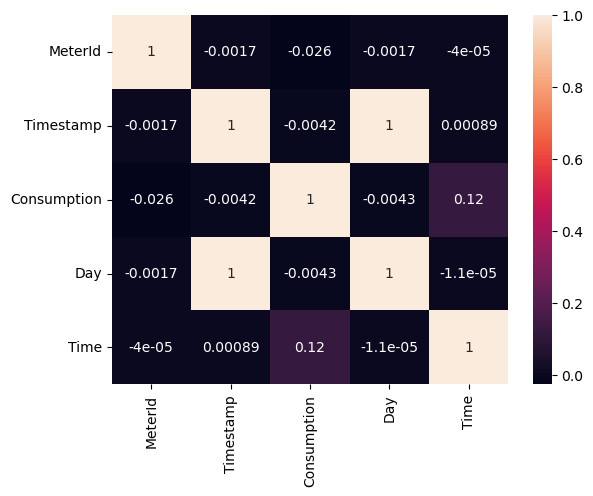

In [20]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

<Axes: >

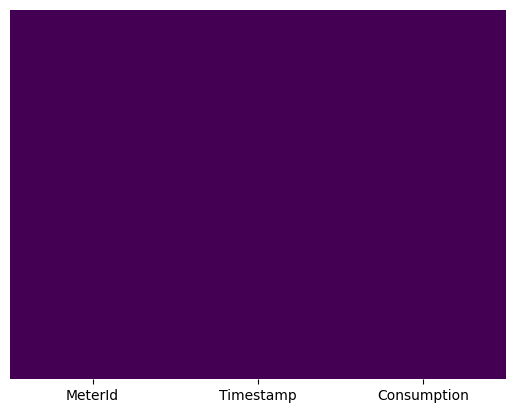

In [7]:
# sns.pairplot(df)
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [45]:
# sns.relplot(x='Consumption',y='MeterId', hue='Timestamp',data=df)

In [92]:
# sns.distplot(df['Timestamp'],bins=5)

In [40]:
plt.pie(df["MeterId"], df["Consumption"],autopct="''%1.2%%''")

AttributeError: module 'matplotlib' has no attribute 'pie'

In [91]:
# df.groupby(["MeterId", "Timestamp", "Consumption"]).size().reset_index()

In [98]:
# sns.barplot("Consumption","Timestamp",hue="MeterId",data=df)

In [34]:
df_test=df[df['Consumption']==0]
df_test.head()
df_test.shape

(243300, 5)

In [35]:
df_train=df[df['Consumption']!=0]
df_train.head()
df_train.shape

(24222538, 5)

In [90]:
# from sklearn.ensemble import RandomForestRegressor

# # Assuming you have additional features like 'Timestamp', 'MeterId', etc.
# features = ['Timestamp', 'MeterId']

# # Split the data into non-zero and zero consumption rows
# non_zero_df = df[df['Consumption'] != 0]
# zero_df = df[df['Consumption'] == 0]

# # Train a regression model
# model = RandomForestRegressor()
# model.fit(non_zero_df[features], non_zero_df['Consumption'])

# # Predict zero values
# zero_df['Consumption'] = model.predict(zero_df[features])

# # Update the original DataFrame
# df.update(zero_df)

Highest Energy Consumption

In [32]:
df[df["Consumption"] == df["Consumption"].max()]

,MeterId,Timestamp,Consumption,Day,Time
2037289,1960,23726,43.844,237,26


In [33]:
df[df["Consumption"] == df["Consumption"].min()]

,MeterId,Timestamp,Consumption,Day,Time
6064,1524,19535,0.0,195,35
6075,1524,19546,0.0,195,46
6083,1524,19606,0.0,196,06
6088,1524,19611,0.0,196,11
6093,1524,19616,0.0,196,16
...,...,...,...,...,...
24464243,1363,72938,0.0,729,38
24464257,1363,73004,0.0,730,04
24464260,1363,73007,0.0,730,07
24464263,1363,73010,0.0,730,10


In [95]:
# sns.distplot(df["Consumption"])

In [ ]:
sns.lineplot(x=df["Consumption"],y=df["Date"],data=df)

In [97]:
df['Consumption'] = df['Consumption'].replace(0, np.nan)
df['Consumption'].interpolate(method='linear', inplace=True)